# Big Data - Lab Project 1
This lab project covers the material from Lectures 1-3. Please make yourself familiar with the lecture content before proceeding. We will be using the [**Pokemon with stats**](https://www.kaggle.com/abcsds/pokemon) dataset courtesy of Alberto Barradas on Kaggle.

**<u>How to complete</u>**:
- For each exercise, read the objective and hint, and then fill the cells containing **TODO**. These will usually be code cells requiring you to write Python code. If we ask you to explain something in plaintext, these may also be Markdown cells.
- Do not modify any cells except for the ones containing **TODO**.
- Do not add or delete any cells from the notebook. If you add any cells during your work, please remove them before submitting.
- Allowed libraries are imported below. No additional libraries may be used for this lab project.
- **Run all cells before submitting. You will only get marks for code that has been run, and has not produced any errors.**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Exercise 1: Dataset Import and Exploration (3 marks)

### Exercise 1.1 (1 mark)
Use pandas to read in the dataset `pokemon.csv` as a pandas `DataFrame` named `df_pokemon`.

Hint: Look at the function [`pd.read_csv`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html).

In [6]:
df_pokemon = pd.read_csv("pokemon.csv")

### Exercise 1.2 (1 mark)
- Use the `print` command to display the number of rows and columns in `df_pokemon`, formatted as a gramatically correct sentence.
- Get an idea of the dataset content by printing the first four rows to the console.

Hint: Look at Python string formatting and the function [`pd.DataFrame.head`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html).

In [7]:
rows = len(df_pokemon.axes[0])
cols = len(df_pokemon.axes[1])
print("The number of columns for df_pokemon is {} and the number of rows is {}.".format(cols,rows))

The number of columns for df_pokemon is 13 and the number of rows is 800.


### Exercise 1.3 (1 mark)
- Use pandas to test if there are any `null` values in `df_pokemon`. Print the result to the console as a boolean.
- Create a new version `df_pokemon_co` of `df_pokemon` which excludes all observations affected by missing data. Use the `print` command to display the number of complete observations to the console, formatted as a gramatically correct sentence.

Hint: Look at the functions [`pd.isnull`](https://pandas.pydata.org/docs/reference/api/pandas.isnull.html) and [`pd.DataFrame.any`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.any.html).

In [8]:
df_pokemon.isnull().any()
df_pokemon_co = df_pokemon.dropna()
df_pokemon_co.isnull().any()
obs = len(df_pokemon_co)
print("The remaining observations without NULL values is {}.".format(obs))

The remaining observations without NULL values is 414.


## Exercise 2: Basic Statistics (3 marks)

### Exercise 2.1 (1 mark)
- Using `df_pokemon_co`, calculate the mean `HP` for legendary and not-legendary pokemon. Store these two means into separate variables.
- Use the `print` command to display the difference in mean `HP` between legendary and not-legendary pokemon to the console in a grammatically correct sentence. The difference should be rounded to two digits.

Hint: Look up how to use rounding in Python string formatting, and at the function [`np.mean`](https://numpy.org/doc/stable/reference/generated/numpy.mean.html) or [`pd.DataFrame.mean`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html).

In [9]:
df_pokemon_co.head()
hp_mean_leg = np.mean(df_pokemon_co[df_pokemon_co["Legendary"]=="Legendary"]["HP"])
hp_mean_nonleg = np.mean(df_pokemon_co[df_pokemon_co["Legendary"]=="NotLegendary"]["HP"])
mean_hp_diff = hp_mean_leg - hp_mean_nonleg

print("The difference between mean 'HP' for legendary pokemon {} and non-legendary pokemon {} is {:.2f}.".format(hp_mean_leg,hp_mean_nonleg,mean_hp_diff))

The difference between mean 'HP' for legendary pokemon 96.425 and non-legendary pokemon 67.89304812834224 is 28.53.


### Exercise 2.2 (1 mark)
Calculate the variance and the standard deviation of the variable `Attack` for pokemon of `Generation` 1, based on `df_pokemon_co`. Use the `print` command to display the results on the console, rounded to two decimals.

Hint: Look up how to use rounding in Python string formatting, and at the function [`np.var`](https://numpy.org/doc/stable/reference/generated/numpy.var.html) and [`np.std`](https://numpy.org/doc/stable/reference/generated/numpy.std.html) or [`pd.DataFrame.var`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.var.html) and [`pd.DataFrame.std`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.std.html).

In [10]:
df_pokemon_co.var = np.var(df_pokemon_co[df_pokemon_co["Generation"]==1]["Attack"])
df_pokemon_co.std = np.std(df_pokemon_co[df_pokemon_co["Generation"]==1]["Attack"])
print(round(df_pokemon_co.var, 2))
print(round(df_pokemon_co.std, 2))

1024.83
32.01


### Exercise 2.3 (1 mark)
- Calculate the standard error (of the mean) for the variable `Attack` for pokemon of `Generation` 1, based on `df_pokemon_co`, and print it to the console.
- In your own words, describe the difference between a standard error (of the mean) and a standard deviation.

Hint: You can use the formulation of the standard error as a lambda function from Lecture 2.

In [11]:
stderr = lambda x: np.sqrt(np.var(x)/x.shape[0]) # standard error lambda function
stderr(df_pokemon_co[df_pokemon_co["Generation"]==1]["Attack"])

3.6247541336448013

The difference between Standard Deviation and Standard Error (of the mean) is that the standard deviation is a statistic that is used to determine the deviation from the mean for a normally distributed data set, where as the Standard Error (of the mean) refers to how precise the standard deviation is when compared to the true population of the data set.  

## Exercise 3: Visualisation (4 marks)

### Exercise 3.1 (2 marks)
Use `matplotlib` to create a boxplot that shows the `Total` attribute for pokemons by their `Type1` categorisation. You should use `df_pokemon_co` for this, and furthermore only consider pokemon whose `Type1` is either *Grass*, *Fire*, *Normal*, *Water*, or *Flying*. The `Total` attribute should be shown on the x axis. Please use an appropriate title and axis labels.

Hint: Look at [`plt.boxplot`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html).

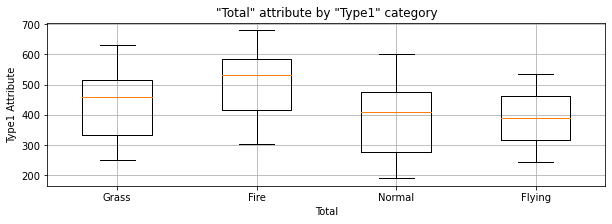

In [12]:
plotlabels = ['Grass','Fire','Normal','Flying']
plotdata = [df_pokemon_co[df_pokemon_co['Type1']==label]['Total'] for label in plotlabels]
plt.figure(figsize=(10, 3)) # Specify figure size
plt.boxplot(plotdata, labels=plotlabels, vert=True, widths=0.5, zorder=3) # Box plot
plt.xlabel('Total') # Set the label for the x axis
plt.ylabel('Type1 Attribute') # Set the label for the y axis
plt.title('"Total" attribute by "Type1" category') # Set the figure title
plt.grid(zorder=0) # Add grid
plt.show()


### Exercise 3.2 (2 marks)
Use `matplotlib` to create a scatterplot of the `Attack` (on x Axis) and `Defense` (on y Axis) attributes for pokemons in `df_pokemon_co`. Distinguish between `Legendary` (in color *Red*) and `NotLegendary` (in color *Blue*) pokemon. Please use an appropriate title and axis labels, as well as a legend.

Hint: Look at [`plt.scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html).

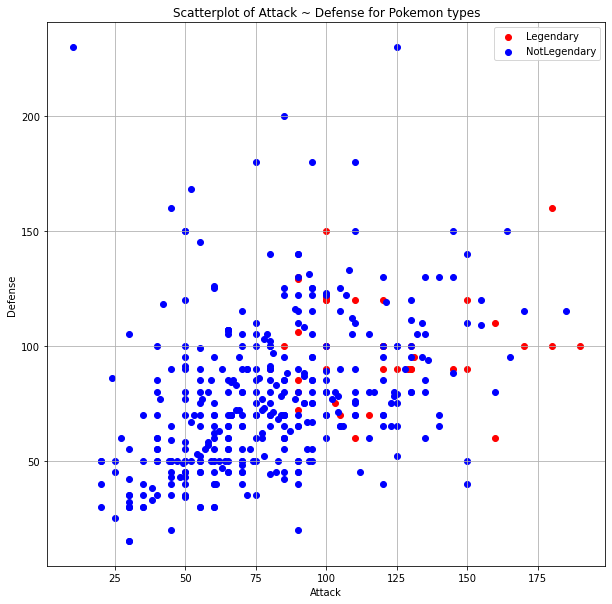

In [13]:
plotlabels = np.sort(df_pokemon_co['Legendary'].unique())
plotdata = [df_pokemon_co[df_pokemon_co['Legendary']==label][['Attack','Defense']] for label in plotlabels]
colors = 'red','blue' # Get colors
plt.figure(figsize=(10, 10)) # Specify figure size
for i, data in enumerate(plotdata):
    plt.scatter(data['Attack'],data['Defense'],color=colors[i],label="{}".format(plotlabels[i]))
plt.xlabel('Attack') # Set the label for the x axis
plt.ylabel('Defense') # Set the label for the y axis
plt.title('Scatterplot of Attack ~ Defense for Pokemon types') # Set the figure title
plt.legend() # Add legend
plt.grid(zorder=0) # Add grid
plt.show()